In [5]:
from google.colab import files #Lectura del archivo
files.upload()

Saving beijing-air-quality.csv to beijing-air-quality.csv


{'beijing-air-quality.csv': b'date, pm25, pm10, o3, no2, so2, co\n2021/6/2, 57, 51, 39, 18, 1, 6\n2021/6/3, 78, 33, 36, 12, , 2\n2021/6/4, 18, , , , , \n2021/5/2, 47, 43, 41, 12, , 1\n2021/5/3, 51, 64, 61, 13, 2, 4\n2021/5/4, 104, 57, 38, 7, , 1\n2021/5/5, 56, 79, 49, 10, , 2\n2021/5/6, 86, 277, 40, 9, 1, 2\n2021/5/7, 168, 129, 40, 5, 1, 2\n2021/5/8, 120, 132, 37, 12, , 1\n2021/5/9, 122, 56, 53, 21, 1, 4\n2021/5/10, 91, 55, 51, 20, 1, 4\n2021/5/11, 81, 44, 72, 14, 1, 6\n2021/5/12, 83, 52, 72, 22, 1, 3\n2021/5/13, 62, 65, 55, 19, 3, 9\n2021/5/14, 146, 60, 43, 14, , 10\n2021/5/15, 115, 36, 30, 9, , 4\n2021/5/16, 45, 27, 38, 9, , 1\n2021/5/17, 16, 47, 49, 19, , 3\n2021/5/18, 54, 64, 58, 21, 1, 5\n2021/5/19, 82, 65, 93, 12, 2, 5\n2021/5/20, 104, 63, 76, 8, 1, 4\n2021/5/21, 115, 64, 101, 11, , 6\n2021/5/22, 113, 69, 107, 13, 1, 5\n2021/5/23, 91, 136, 34, 7, , 1\n2021/5/24, 116, 54, 33, 8, 1, 1\n2021/5/25, 62, 70, 66, 7, 1, 2\n2021/5/26, 67, 63, 47, 15, , 4\n2021/5/27, 63, 52, 36, 16, 1, 4\n

In [66]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import LSTM
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [81]:
# fix random seed for reproducibility
np.random.seed(7)

In [82]:
df = pd.read_csv("beijing-air-quality.csv")


In [83]:
print(df.shape) # Tamaño original
df.drop([' pm25',' pm10',   ' o3',  ' no2',  ' so2'], axis=1, inplace=True)
for col in df.columns:
    print(col)

for i in range(len(df[' co'])):
  if df[' co'][i] != ' ':
    df[' co'][i] = float(df[' co'][i])
  else:
    df.drop(i,axis=0,inplace=True)

print(type(df[' co'][16]))
print(df.shape) # Tamaño quitando valores inexistentes

df.head()

(2705, 7)
date
 co
<class 'float'>
(2695, 2)


,date,co
0,2021/6/2,6
1,2021/6/3,2
3,2021/5/2,1
4,2021/5/3,4
5,2021/5/4,1


In [84]:
df['date'] = pd.to_datetime(df['date'])
ind_df = df.set_index(['date'], drop=True)
ind_df.head()

,co
date,
2021-06-02,6
2021-06-03,2
2021-05-02,1
2021-05-03,4
2021-05-04,1


In [85]:
ind_df = ind_df.values
ind_df = ind_df.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(ind_df)

In [86]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1805 890


In [87]:
def create_dataset(dataset, look_back=6):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [88]:
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [89]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainY.shape)

(1798,)


In [90]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
1798/1798 - 3s - loss: 0.0054
Epoch 2/200
1798/1798 - 2s - loss: 0.0042
Epoch 3/200
1798/1798 - 2s - loss: 0.0037
Epoch 4/200
1798/1798 - 2s - loss: 0.0036
Epoch 5/200
1798/1798 - 2s - loss: 0.0036
Epoch 6/200
1798/1798 - 2s - loss: 0.0036
Epoch 7/200
1798/1798 - 2s - loss: 0.0035
Epoch 8/200
1798/1798 - 2s - loss: 0.0035
Epoch 9/200
1798/1798 - 2s - loss: 0.0035
Epoch 10/200
1798/1798 - 2s - loss: 0.0035
Epoch 11/200
1798/1798 - 2s - loss: 0.0035
Epoch 12/200
1798/1798 - 2s - loss: 0.0035
Epoch 13/200
1798/1798 - 2s - loss: 0.0035
Epoch 14/200
1798/1798 - 2s - loss: 0.0035
Epoch 15/200
1798/1798 - 2s - loss: 0.0034
Epoch 16/200
1798/1798 - 2s - loss: 0.0035
Epoch 17/200
1798/1798 - 2s - loss: 0.0035
Epoch 18/200
1798/1798 - 2s - loss: 0.0034
Epoch 19/200
1798/1798 - 2s - loss: 0.0034
Epoch 20/200
1798/1798 - 2s - loss: 0.0034
Epoch 21/200
1798/1798 - 2s - loss: 0.0034
Epoch 22/200
1798/1798 - 2s - loss: 0.0034
Epoch 23/200
1798/1798 - 2s - loss: 0.0034
Epoch 24/200
1798/17

In [91]:
# make predictions
trainPredict = model.predict(trainX,batch_size)
testPredict = model.predict(testX,batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.31 RMSE
Test Score: 8.43 RMSE


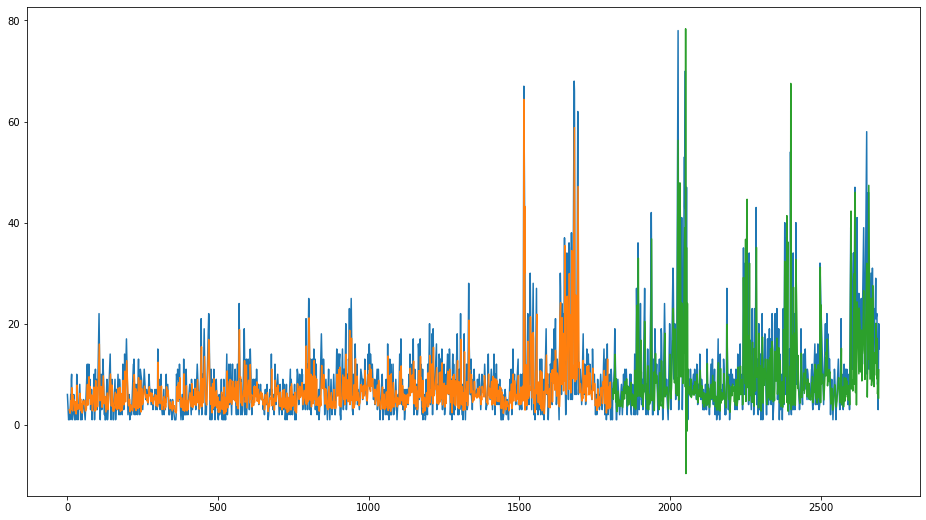

In [92]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [64]:
y_pred_test_nn = model.predict(testX,batch_size)
y_train_pred_nn = model.predict(trainX,batch_size)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(trainY, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(testY, y_pred_test_nn)))

ValueError: ignored